# **CLYCLISTIC CAPSTONE PROJECT**

**1.	About the company**

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Their users are more likely to ride for leisure, but about 30% use them to commute to work each day.


Cyclistic has flexible pricing plans: single-ride passes, full-day passes, and annual memberships, which has grown its customer segment and reach over time. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.  


**2.	Business Task**

Cyclistic currently has a customer base of casual and member riders but they believe they can expand by maximizing their casual riders and converting them to member riders rather than targeting all-new customers. Business task is to understand the **‘nature of bike usage between casual and annual member and the insight gained applied in coming up with a strategy to increase annual memberships’.**


**Key stakeholders of this study are**; Cyclistic executive team – executive that will decide to approve the recommended marketing program, Lily Moreno – director of marketing, cyclistic marketing analytics team – a team of analyst responsible for analyzing and reporting data that guides marketing strategy.  



**3.	Description of all data sources used**

The data source used for this case study is [Cyclistic Tripdata (2101 - 2112)](https://divvy-tripdata.s3.amazonaws.com/index.html). The dataset was made available through Motivate International Inc. This data set contains bike ride details from year 2013 – 2022 (July being the most recent month) collated on a monthly basis and sometimes quarterly basis. It includes information about bike type, start and end time, start and end station, latitude, longitude and customer type. 

Data used is easily accessible, its open source and can be copied but has data privacy issues which prohibits you from using riders’ personally identifiable information. The dataset is large thus ruling out sample bias. Its integrity and credibility is also intact as its first party data and internal to the company. Data collected from the company’s’ website covered a one-year period from January 2021 to December 2021. Each CSV file has riders' trip records by their ride IDs: this is primary key of the data


**4.	Documentation of data cleaning/manipulation**

Python, its library and visualization package was used to clean, manipulate analyze the dataset under review and also provide visualization of result analysis.


**5.	Analyze and share**

In [ ]:
#using seaborn and matplot as my visualization tool, i needed to install the package
pip install seaborn

In [ ]:
#importing all relevat package to be used for my analysis
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#importing the datasets using the read_csv function
tripdata_2021_01 = pd.read_csv(r"C:\Users\HP\Desktop\Divvy_trip_data\202101-divvy-tripdata.csv")
tripdata_2021_02 = pd.read_csv(r"C:\Users\HP\Desktop\Divvy_trip_data\202102-divvy-tripdata.csv")
tripdata_2021_03 = pd.read_csv(r"C:\Users\HP\Desktop\Divvy_trip_data\202103-divvy-tripdata.csv")
tripdata_2021_04 = pd.read_csv(r"C:\Users\HP\Desktop\Divvy_trip_data\202104-divvy-tripdata.csv")
tripdata_2021_05 = pd.read_csv(r"C:\Users\HP\Desktop\Divvy_trip_data\202105-divvy-tripdata.csv")
tripdata_2021_06 = pd.read_csv(r"C:\Users\HP\Desktop\Divvy_trip_data\202106-divvy-tripdata.csv")
tripdata_2021_07 = pd.read_csv(r"C:\Users\HP\Desktop\Divvy_trip_data\202107-divvy-tripdata.csv")
tripdata_2021_08 = pd.read_csv(r"C:\Users\HP\Desktop\Divvy_trip_data\202108-divvy-tripdata.csv")
tripdata_2021_09 = pd.read_csv(r"C:\Users\HP\Desktop\Divvy_trip_data\202109-divvy-tripdata.csv")
tripdata_2021_10 = pd.read_csv(r"C:\Users\HP\Desktop\Divvy_trip_data\202110-divvy-tripdata.csv")
tripdata_2021_11 = pd.read_csv(r"C:\Users\HP\Desktop\Divvy_trip_data\202111-divvy-tripdata.csv")
tripdata_2021_12 = pd.read_csv(r"C:\Users\HP\Desktop\Divvy_trip_data\202112-divvy-tripdata.csv")

In [ ]:
#checking to confirm my datasets were imported by sampling one of the dataset
tripdata_2021_04.info(2)

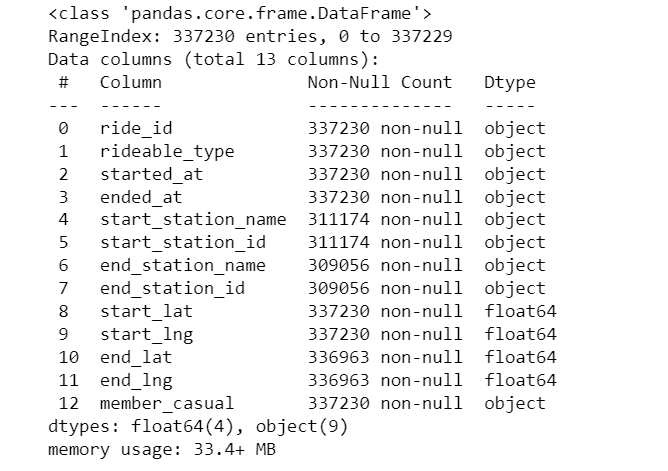

In [ ]:
#now combining all the datasets into one single dataset so its easier to analyse as a single set
bike_data = pd.concat([tripdata_2021_01, tripdata_2021_02, tripdata_2021_03, tripdata_2021_04, tripdata_2021_05, tripdata_2021_06, tripdata_2021_07, tripdata_2021_08, tripdata_2021_09, tripdata_2021_10, tripdata_2021_11, tripdata_2021_12])

In [ ]:
#getting a summarised view of combined data
bike_data.head()

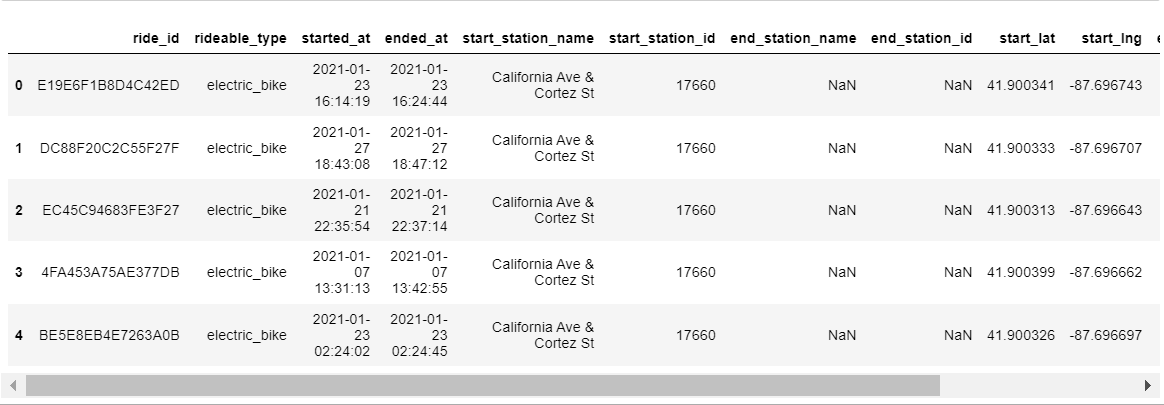

In [ ]:
#to get the data type of the dataset
bike_data.info()

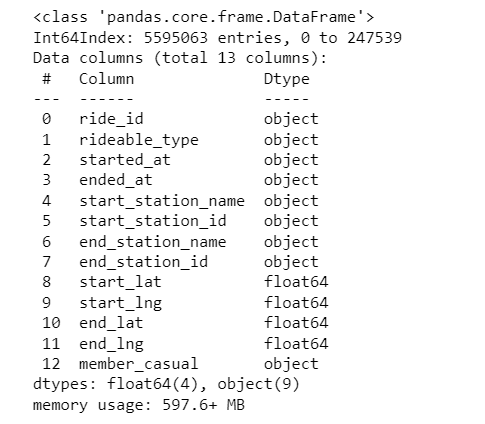

In [ ]:
#checking for null values
bike_data.isna().sum()

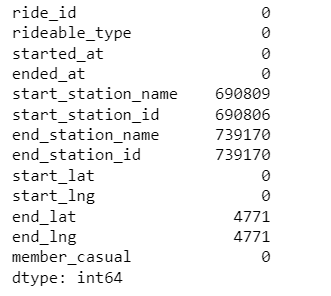

In [ ]:
#getting the value of the dataset, to confirm if the null values are significant, to determine if they would be dropped.
bike_data.shape

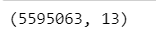

In [ ]:
(bike_data.isna().sum()/5595063) * 100

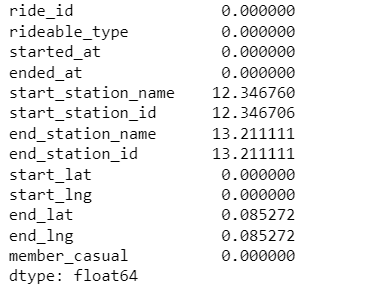

In [ ]:
#The null values are less than 15%, so will drop them and proceed with analysis
bike_data.dropna(axis=0, inplace=True)
bike_data.isna().sum()

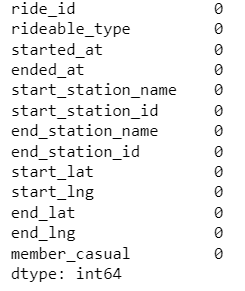

In [ ]:
#checking for duplicate values
bike_data[bike_data.duplicated()]

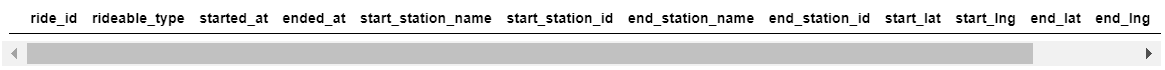

In [ ]:
#changing the date format for start and end time
bike_data['started_at'] = pd.to_datetime(bike_data['started_at'], dayfirst = True)
bike_data['ended_at'] = pd.to_datetime(bike_data['ended_at'], dayfirst = True)
bike_data.info()

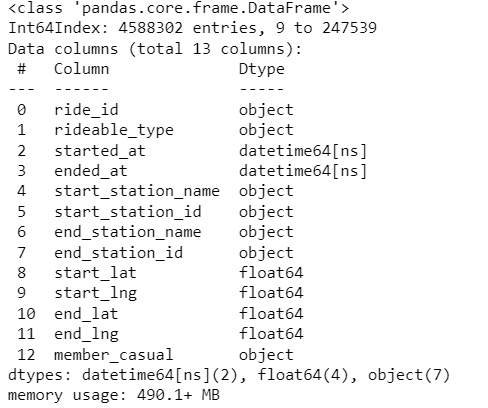

In [ ]:
#creating no of hours, day of the week and month number for start date& time
bike_data['Hour'] = bike_data.started_at.apply(lambda x: x.hour)
bike_data['Day'] = bike_data.started_at.apply(lambda x: x.day_name())
bike_data['Month'] = bike_data.started_at.apply(lambda x: x.month)

bike_data.head()

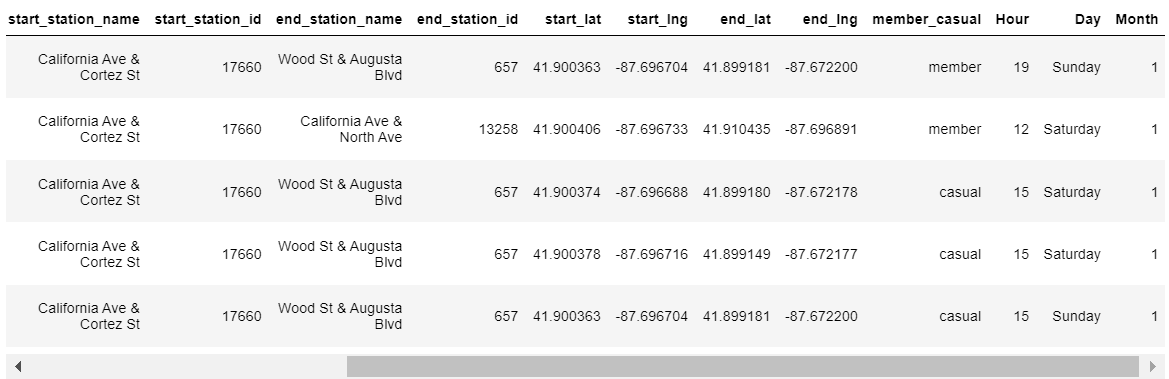

In [ ]:
# Finding out the current number of Members and Casual Riders 
bike_data.member_casual.value_counts()

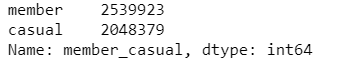

In [ ]:
#  Finding the number of riders as per day of the week
bike_data.groupby('member_casual')['Day'].value_counts()

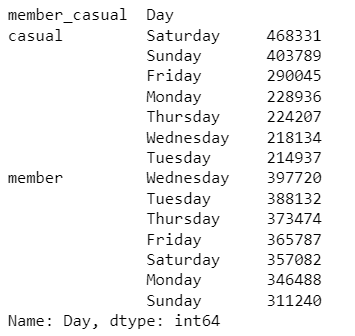

In [ ]:
#to get the total ride length, will subtract the end time from the start time to know the time spent per rider from one station to the other
bike_data['Ride_length'] = (bike_data['ended_at'] - bike_data['started_at'])

import datetime as datetime
from datetime import timedelta
bike_data['Ride_time'] = (bike_data['Ride_length'])/timedelta(minutes=1)
bike_data['Ride_time'] = bike_data['Ride_time'].round(decimals = 2)

bike_data.head()

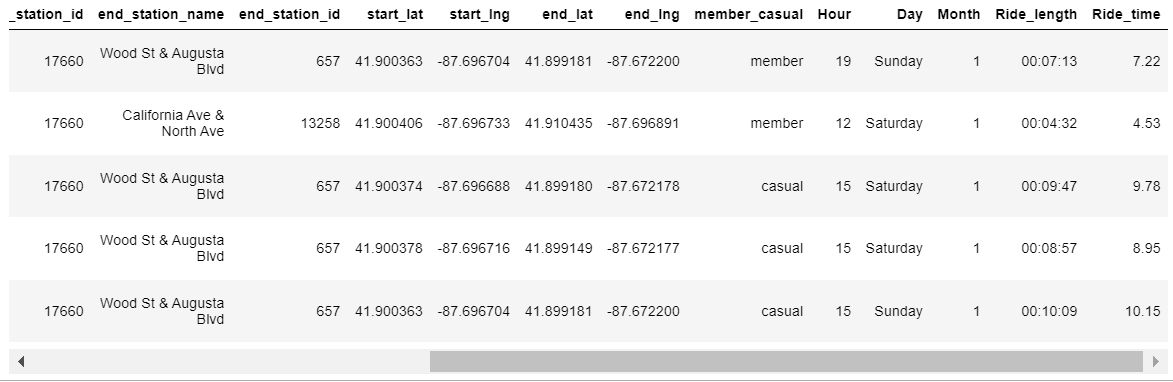

In [ ]:
#given co-ordinates, lets find distance in km from one point to the other
bike_data['Lat'] = (bike_data['end_lat'] - bike_data['start_lat'])
bike_data['Lng'] = (bike_data['end_lng']) - bike_data['start_lng']

In [ ]:
#using the math function to convert the lat, lng to distance in km
import math

In [ ]:
bike_data['Distance'] = np.sqrt((bike_data['Lat']** 2) + (bike_data['Lng'] ** 2))
bike_data['Distance'] = bike_data['Distance'] * 111
bike_data['Distance'].head()

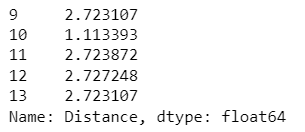

In [ ]:
bike_data.head()

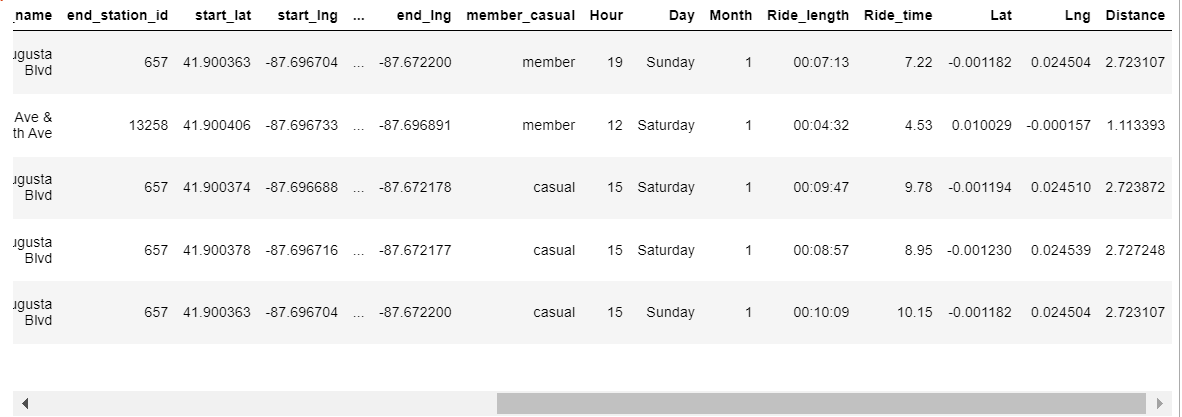

In [ ]:
#earlier we separated start date into hr, month and day but the month is in numeric format, to convert it to string label that assigns 1 as January, we use the code below
month = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
bike_data['Month_Name'] = bike_data['Month'].map(month)
bike_data['Month_Name'].head()

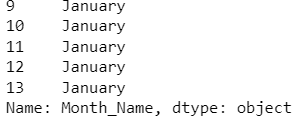

In [ ]:
bike_data.head()

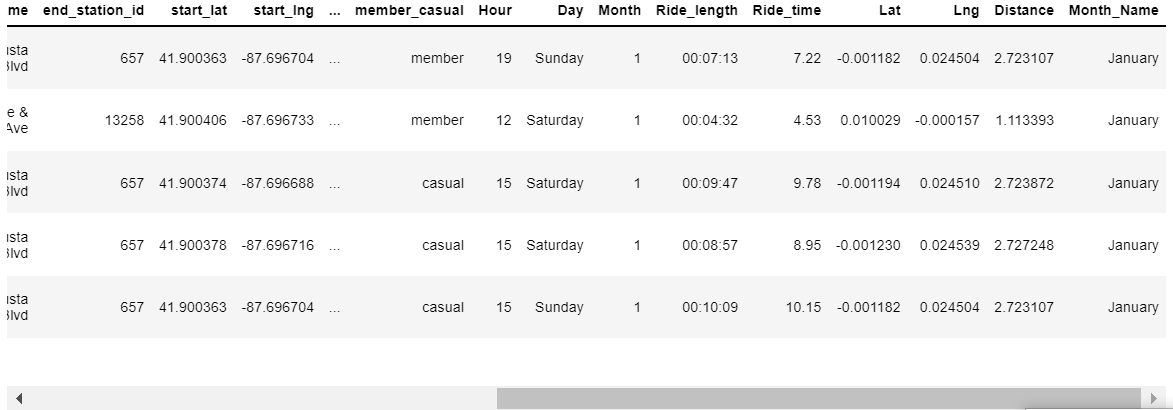

In [ ]:
# Finding the number of riders as per month
bike_data.groupby('member_casual')['Month_Name'].value_counts()

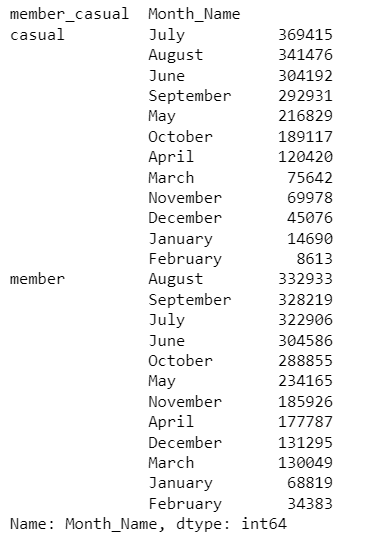

In [ ]:
bike_data.groupby('member_casual').mean()['Ride_time']

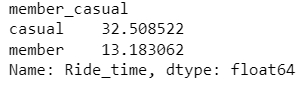

In [ ]:
#calculating average ride completed per weekday
average_day_ride = bike_data.groupby('Day').mean()['Ride_time']
average_day_ride

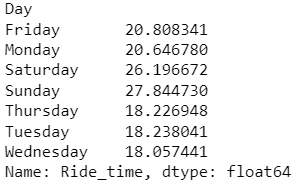

In [ ]:
#calculating average ride per user distribution (casual& member)
avg_user_day = bike_data.groupby(['Day', 'member_casual']).agg({'Ride_time':['mean']})
avg_user_day

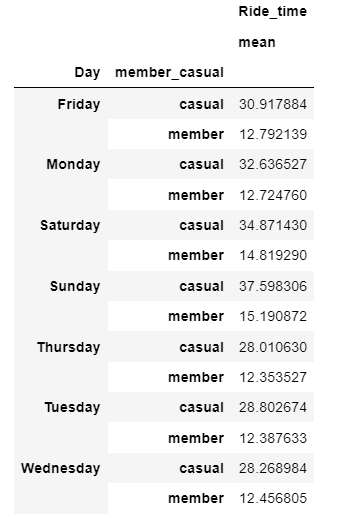

In [ ]:
#now we know the average ride per day per member type, lets get the total ride completed per day per member type to get the actual count
user_daytrip = bike_data.groupby(['Day','member_casual']).size().to_frame()
user_daytrip

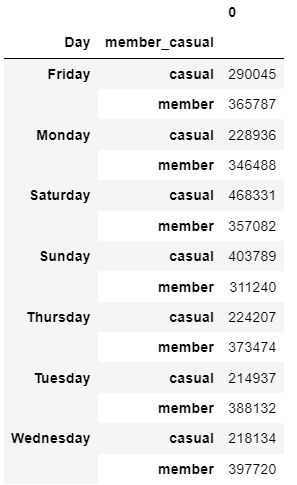

In [ ]:
pip install plotly

In [ ]:
# plotly libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots

In [ ]:
#to check distribution of riders by count
sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
sns.countplot(x='member_casual', hue='member_casual', data=bike_data, palette='magma_r')

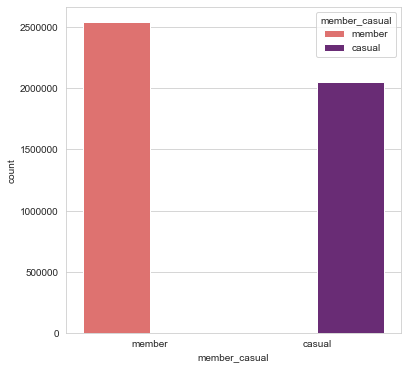

In [ ]:
#plot to show the count of rides per weekday
plt.figure(figsize=(8,6))
sns.countplot(x='Day', hue='member_casual', data=bike_data, palette='winter')
plt.tight_layout()

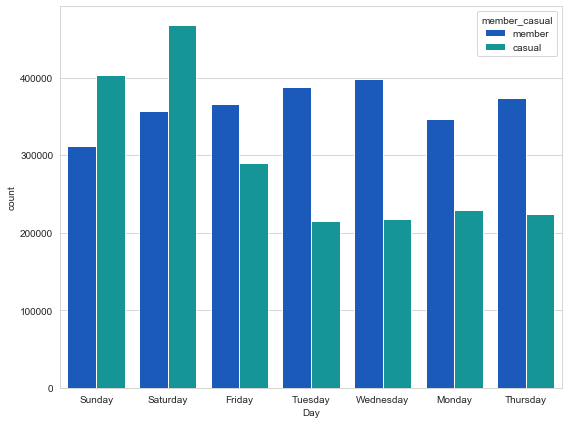

In [ ]:
#to further check count of rides, we checked by hour of the day
plt.figure(figsize=(8,6))
sns.countplot(x='Hour', hue='member_casual', data=bike_data, palette='cividis')
plt.tight_layout()

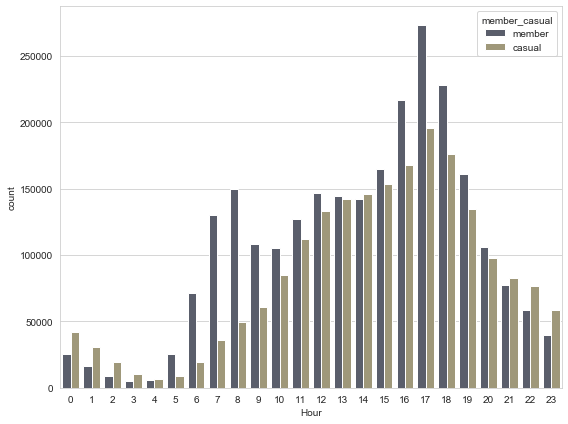

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Month_Name', hue='member_casual', data=bike_data, palette='ocean_r')

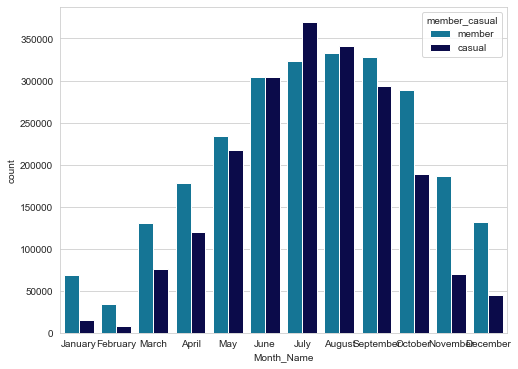

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='member_casual', y='Distance', data=bike_data, palette='coolwarm')

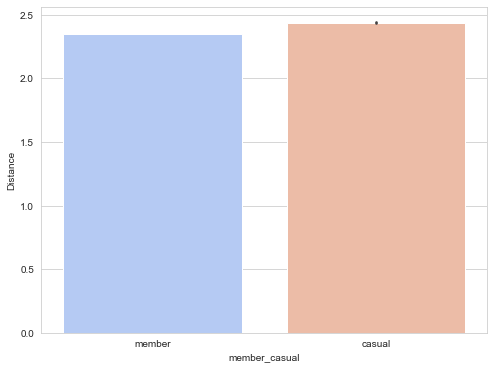

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='Month_Name', y='Distance', hue = 'member_casual', data=bike_data, palette='Pastel1')

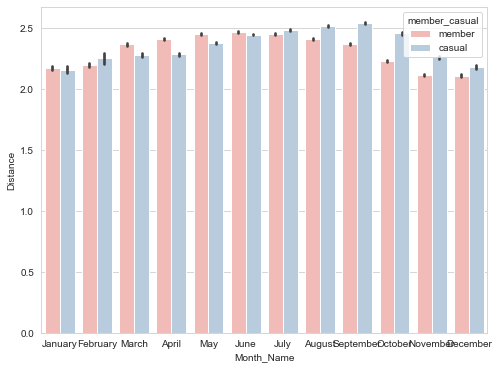

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='member_casual', y='Ride_time', data=bike_data, palette='Paired')

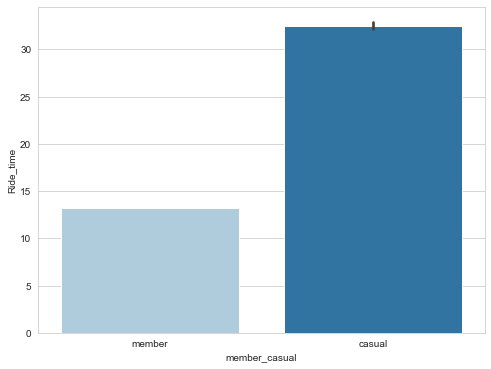

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='rideable_type', hue='member_casual', data=bike_data, palette='bwr')

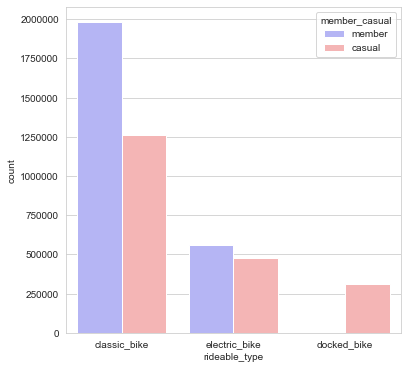

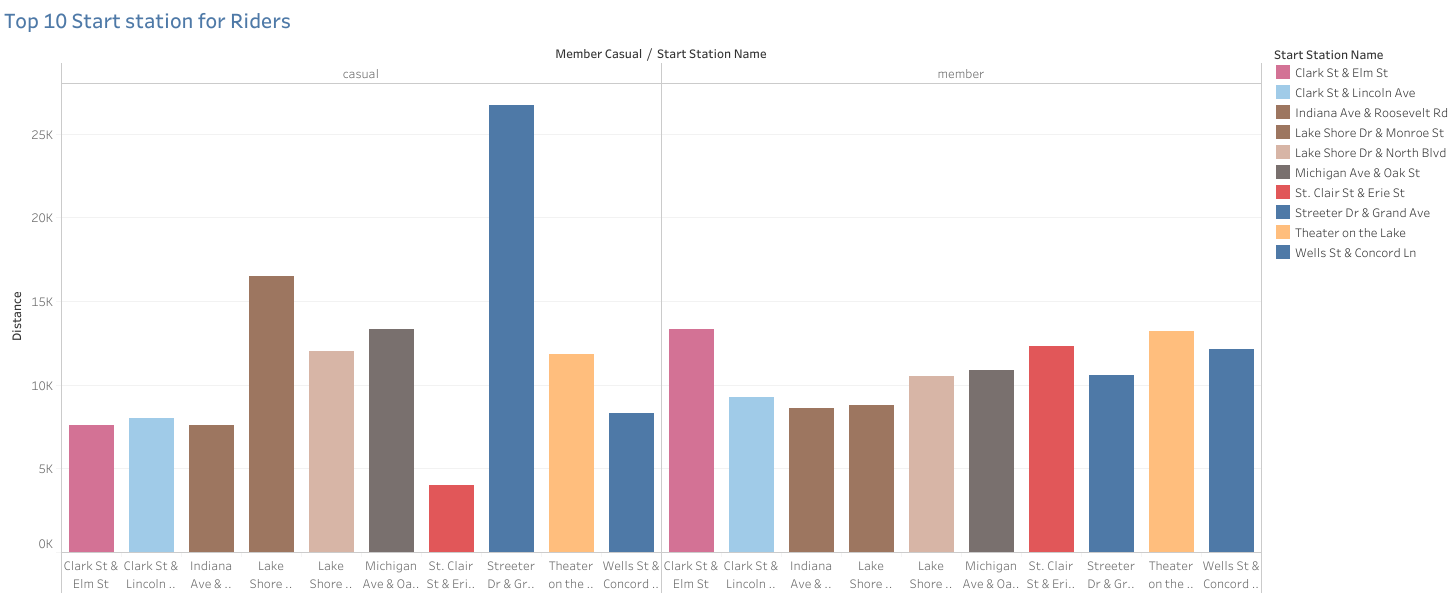

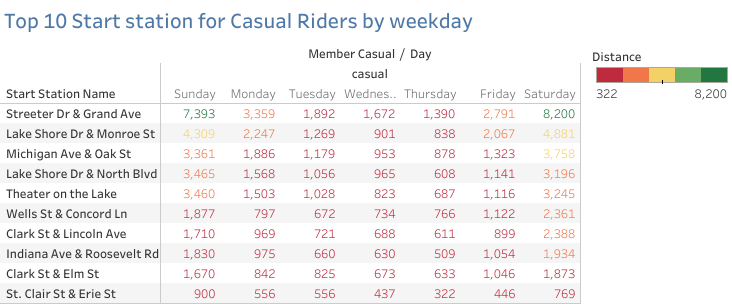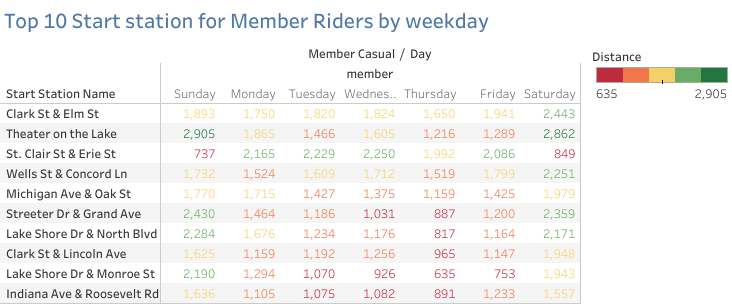

**6.	Conclusions and Recommendations**

Casual riders had a longer ride time than members, which is a positive for cyclistic in their approach on  expanding revenue by getting casual riders to embrace membership. This can be achieved by introducing coupons on annual membership based on ride time and distance covered, this would attract the casual riders to subscribe since they currently ride for a longer time than current members. 


It was also observed that the largest number of casual rides occurred on Saturday and Sunday. This indicates that the purpose of riding for most casual riders is mostly leisure than commute. Cyclistic can target the casual riders by sending out an email letter or push text that introduces a weekend only membership at a discounted price to the annual membership. 

A discounted weekday plan should also be implemented, this will get more casual riders to use their bike often on weekdays and in time entice them to embrace annual membership plan. 


The analysis also showed that more rides happened in July and August which are summer months. Cyclistic can focus on this period and maximize profit by introducing a summer only membership for casual riders who will be hesitant to subscribe to a full year membership plan. 


Streeter Dr Avenue was the start point with the highest number of rides for casual riders (which consist of parks, recreational centers, beach etc; this buttresses the point that most casual riders ride for leisure). To engage casual riders at the other stations, a tour the city campaign can be organized to cover a minimum of 52 suggested routes weekly starting at currently less engaged start stations.The bike is rented at these stations for a token in form of rental fee and the idea of touring the city in a year is sold (the price in determining the rental fee can be benchmarked to an annual subscription discounted on a weekly basis).


Monthly/weekly membership plan should be introduced, this will propel casual rider to embrace the idea of membership plan and will eventually result in them embracing the annual plan as they become more comfortable with the weekly/monthly plan. 


A customer appreciation incentive, such as 10% off annual membership fee renewal for returning riders who wish to enjoy cyclistic offers long term could also be offered.
